In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from tqdm import tqdm
import pickle
import ast

KeyboardInterrupt: 

#### Needed data for this notebook:
Training & Prediction: The complete preprocessed datasets ...
   * ... for numerical models: ```Data_Numerical_Clustering_all.csv``` (all possible targed variables need to be onehot-encoded in this file)
   * ... for textual models: ```Data_Text_Clustering_all.csv```
   * ... containing the original text (after filter and lemmatisation etc.): ```blogtext_filtered.csv```

Note: Here a sample of 100.000 lines was used for each of the datasets above.

#### Note:
The validation is already finished and doesn't need to be run anymore. The validation results are completely loaded in the following cells

In [15]:
# Define the directory where your data is stored
data_directory = './data/'

# K-Means

## Validation of k

In [16]:
# Load validation results if they are already existing. 
# If not, create new and run the following 3 cells (currently formatted as raw text)

try:
    validation_results = pd.read_csv(data_directory + f'validation_results.csv')
    print('Loaded an intermediate result:')
except:
    validation_results = pd.DataFrame(data={'Features': [], 'Sum of squared distances': []})
    print('Created new Dataframe for results:')
validation_results

Loaded an intermediate result:


,Features,Sum of squared distances,Elbow
0,Text,"{2: 83063.81986898324, 3: 82722.9574689688, 4:...",17
1,Numerical,"{2: 1540067.5963079387, 3: 1426954.850363098, ...",25


### Text Features

In [6]:
# Validate the correct K of the text kmeans models by testing Ks between 2 and 20 and save the results
text_features = pd.read_csv(data_directory + f'Data_Text_Clustering.csv')
Sum_of_squared_distances = {}
K = range(2,20)
for k in tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200)
    km = km.fit(text_features)
    Sum_of_squared_distances[k] = km.inertia_
        
new_row = {'Features':'Text', 'Sum of squared distances':Sum_of_squared_distances}
validation_results = validation_results.append(new_row, ignore_index=True)
validation_results.to_csv(data_directory + f'validation_results.csv', index = False)

100%|██████████| 18/18 [2:51:07<00:00, 570.42s/it]  


### Numerical Features

In [23]:
# Validate the correct K of the numerical kmeans models by testing Ks between 2 and 30 and save the results
numerical_features = pd.read_csv(data_directory + f'Data_Numerical_Clustering.csv')
Sum_of_squared_distances = {}
K = range(2,30)
for k in tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200)
    km = km.fit(numerical_features)
    Sum_of_squared_distances[k] = km.inertia_
        
new_row = {'Features':'Numerical', 'Sum of squared distances':Sum_of_squared_distances}
validation_results = validation_results.append(new_row, ignore_index=True)
validation_results.to_csv(data_directory + f'validation_results.csv', index = False)

100%|██████████| 28/28 [02:04<00:00,  4.45s/it]


Text


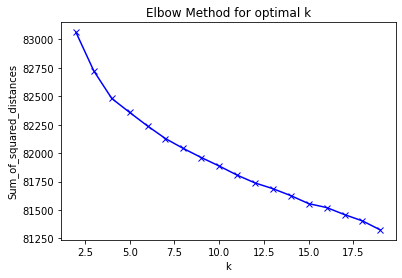

---------------------------------------------------
Numerical


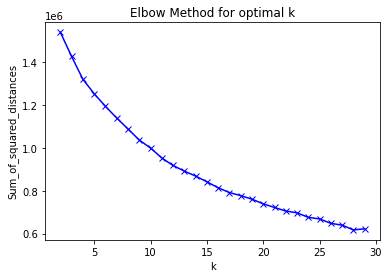

---------------------------------------------------


In [23]:
# Print the validation results for each model
for i in validation_results.iterrows():
    print(i[1][0])
    try:
        dictionary = ast.literal_eval(i[1][1])
    except:
        dictionary = i[1][1]
    plt.plot(dictionary.keys(), dictionary.values(), 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title(f'Elbow Method for optimal k')
    plt.show()
    print('---------------------------------------------------')

### Store Validation Results

In [24]:
# Define the validated elbow points of K received from the graphs

elbow_k = [17, 25]
validation_results['Elbow']=elbow_k

In [25]:
validation_results

,Features,Sum of squared distances,Elbow
0,Text,"{2: 83063.81986898324, 3: 82722.9574689688, 4:...",17
1,Numerical,"{2: 1540067.5963079387, 3: 1426954.850363098, ...",25


In [50]:
validation_results.to_csv(data_directory + f'validation_results.csv', index = False)

## Training of Clusters

### All Features

In [ ]:
# Load the training Datasets to train the whole models (needs the full dataset, not only a sample!)

text_all = pd.read_csv(data_directory + f'Data_Text_Clustering_all.csv')

numerical_all = pd.read_csv(data_directory + f'Data_Numerical_Clustering_all.csv')

In [52]:
# Train the 8 models based on the whole dataset
models = {i[1][0]+'_Clustering': KMeans(n_clusters=i[1][3], max_iter=200) for i in validation_results.iterrows()}

models['Text_Clustering'].fit(pd.read_csv(data_directory + f'Data_Text_Clustering.csv'))
print('Finished a model')

models['Numerical_Clustering'].fit(pd.read_csv(data_directory + f'Data_Numerical_Clustering.csv'))
print('Finished a model')

Finished a model
Finished a model


## Prediction of Clusters

In [55]:
# Predict the data, which were also used for training

predictions = {i[1][0]+'_Clustering': [] for i in validation_results.iterrows()}

predictions['Text_Clustering'] = list(models['Text_Clustering'].predict(pd.read_csv(data_directory + f'Data_Text_Clustering.csv')))
print('Finished a prediction')

predictions['Numerical_Clustering'] = list(models['Numerical_Clustering'].predict(pd.read_csv(data_directory + f'Data_Numerical_Clustering.csv')))
print('Finished a prediction')

Finished a prediction
Finished a prediction


In [58]:
# Load the dataset which stores also the original information and combine it with the predicted clusters 
# to interpret the clusters later

filtered_raw_data = pd.read_csv(data_directory + 'bolgtext_filtered.csv')
for new_feature in list(predictions.keys())[8:]:
    filtered_raw_data[new_feature] = predictions[new_feature]

In [59]:
filtered_raw_data

,gender,age,topic,sign,Text length,Number URLs,Number mails,Uppercase ratio,Lowercase ratio,Number ratio,...,Unique words ratio,Average letters per sentence,Variance of letters per sentence,Average words per sentence,Variance of words per sentence,Maximal uppercase ratio per sentence,Length of the maximal uppercase ratio sentence,text_preprocessed,Text_Clustering_all_100000,Numerical_Clustering_all_100000
0,female,24,indUnk,Sagittarius,826,0,0,0.024213,0.713075,0.004843,...,0.687898,66.166667,3770.972222,13.083333,128.409722,0.166667,6,1 corinthians 5:11 ' but -pron- write company ...,7,7
1,female,23,Arts,Virgo,2666,0,0,0.028132,0.746437,0.002626,...,0.623984,105.120000,3962.745600,19.680000,124.777600,0.133333,15,move jersey city a month ago -pron- idea -pron...,14,7
2,female,24,indUnk,Taurus,269,1,0,0.040892,0.665428,0.000000,...,0.909091,50.600000,1954.640000,8.800000,84.960000,0.210526,19,hey metro save money a hike heel fare hike yea...,16,9
3,female,26,indUnk,Taurus,1756,0,0,0.015945,0.763667,0.000000,...,0.632258,78.227273,1352.721074,14.090909,45.900826,0.055556,18,hilarious movie -pron- year a comedy movie abs...,9,7
4,female,34,Technology,Capricorn,9046,0,0,0.037917,0.742096,0.003648,...,0.550605,112.936709,4624.844095,19.898734,144.420125,0.333333,60,short attach bumper a pickup truck a cock ring...,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88385,female,23,Arts,Aquarius,609,0,0,0.032841,0.715928,0.000000,...,0.666667,59.100000,1282.090000,11.400000,43.240000,0.105263,19,happen yesterday -pron- mall store -pron- visi...,7,7
88386,female,23,Student,Pisces,4006,5,0,0.020969,0.742636,0.009735,...,0.469444,98.200000,5066.410000,18.000000,182.650000,0.125000,8,-pron- ' ve think language good -pron- ' m maj...,14,11
88387,male,25,indUnk,Gemini,361,2,0,0.022161,0.709141,0.000000,...,0.723077,116.666667,402.888889,21.666667,29.555556,0.040000,125,-pron- fish poudre river a saturday morning -p...,7,15
88388,female,14,Arts,Leo,392,0,0,0.020408,0.701531,0.000000,...,0.845070,74.200000,1987.760000,14.200000,51.760000,0.062500,48,i ' ve shut room past day live water completel...,7,9


In [60]:
# Save the data with clusters 
filtered_raw_data.to_csv(data_directory + f'bolgtext_filtered_new_features.csv', index = False)

In [61]:
# Save the models and predictions
with open('models.pickle', 'wb') as handle:
    pickle.dump(models, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('predictions.pickle', 'wb') as handle:
    pickle.dump(predictions, handle, protocol=pickle.HIGHEST_PROTOCOL)